In [2]:
from utilities import *

dataset = database_covers('map_data/')
points = parse_gpx_to_points('out.gpx')

In [3]:
elevation_points = [ele for _, ele in points]

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

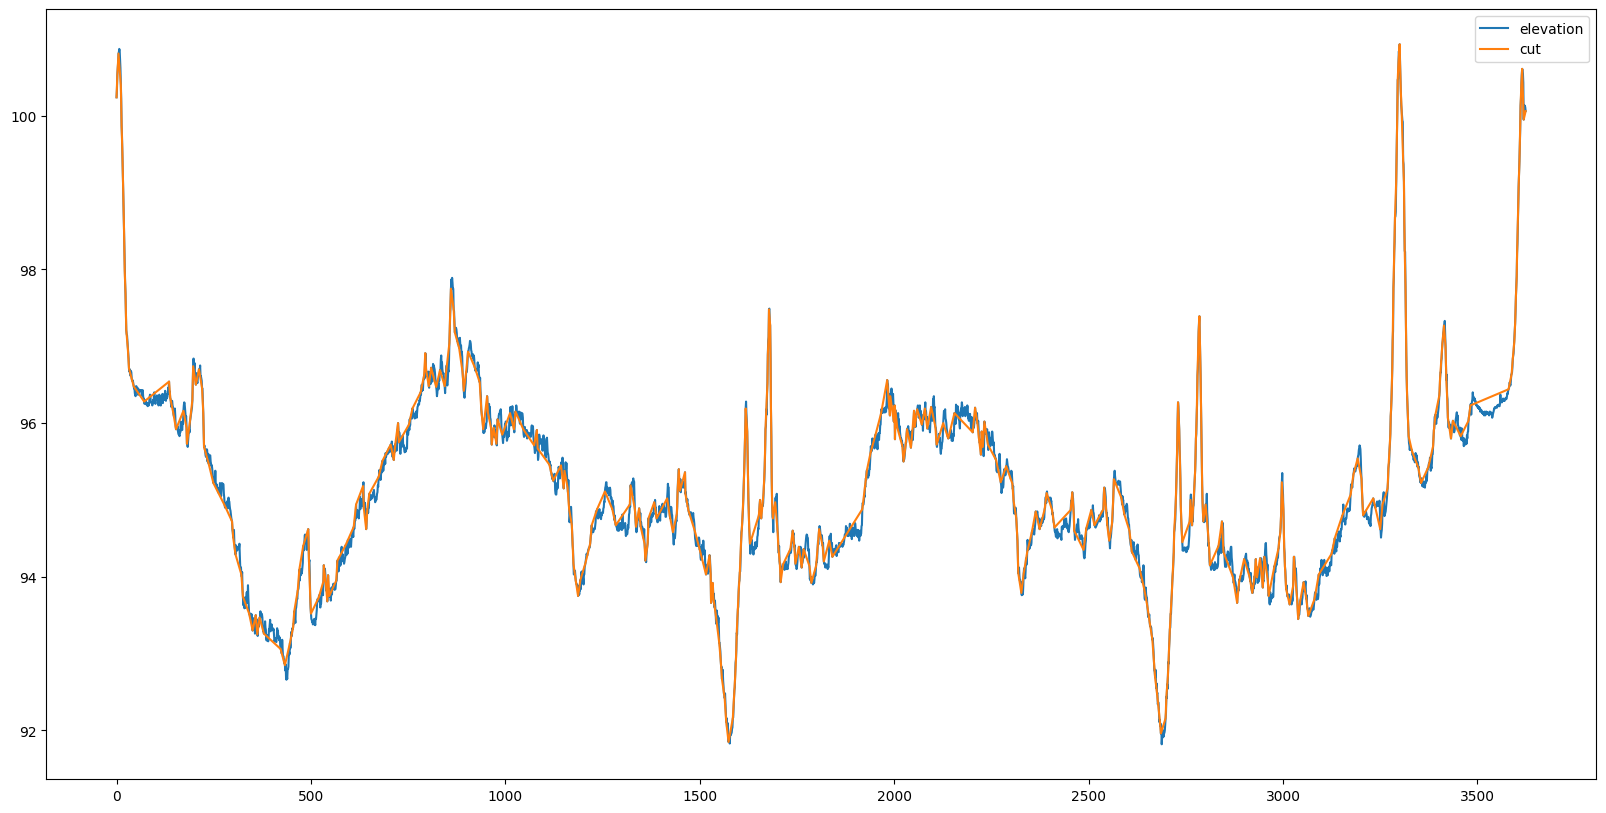

In [5]:
data = cut_data_to_threshold([(i, ele) for i, ele in enumerate(elevation_points)], 0.2)
# data = [(y, x) for x, y in data]

plt.figure(figsize=(20, 10))
plt.plot(elevation_points, label='elevation')
X, Y = zip(*data)
plt.plot(X, Y, label='cut')
plt.legend()
plt.show()

>> 2 - Downward! : 0.015%, value 1.53
>> 51 - Upward! : 0.02%, value 1.55
>> 101 - Downward! : 0.016%, value 1.57
>> 139 - Upward! : 0.02%, value 1.44
>> 165 - Downward! : 0.018%, value 1.74
>> 184 - Upward! : 0.02%, value 1.42
>> 199 - Downward! : 0.016%, value 1.54
>> 205 - Upward! : 0.02%, value 1.49
>> 216 - Downward! : 0.017%, value 1.66
>> 238 - Upward! : 0.02%, value 1.47
>> 253 - Downward! : 0.016%, value 1.57
>> 297 - Upward! : 0.02%, value 1.48
>> 322 - Downward! : 0.015%, value 1.43
>> 336 - Upward! : 0.02%, value 1.56
>> 351 - Downward! : 0.017%, value 1.62
>> 357 - Upward! : 0.02%, value 1.65
>> 369 - Downward! : 0.019%, value 1.86
>> 387 - Upward! : 0.02%, value 1.57
>> 405 - Downward! : 0.017%, value 1.59
>> 416 - Upward! : 0.02%, value 1.62
>> 452 - Downward! : 0.015%, value 1.52
>> 469 - Upward! : 0.02%, value 1.59
>> 478 - Downward! : 0.015%, value 1.47
>> 484 - Upward! : 0.02%, value 1.5


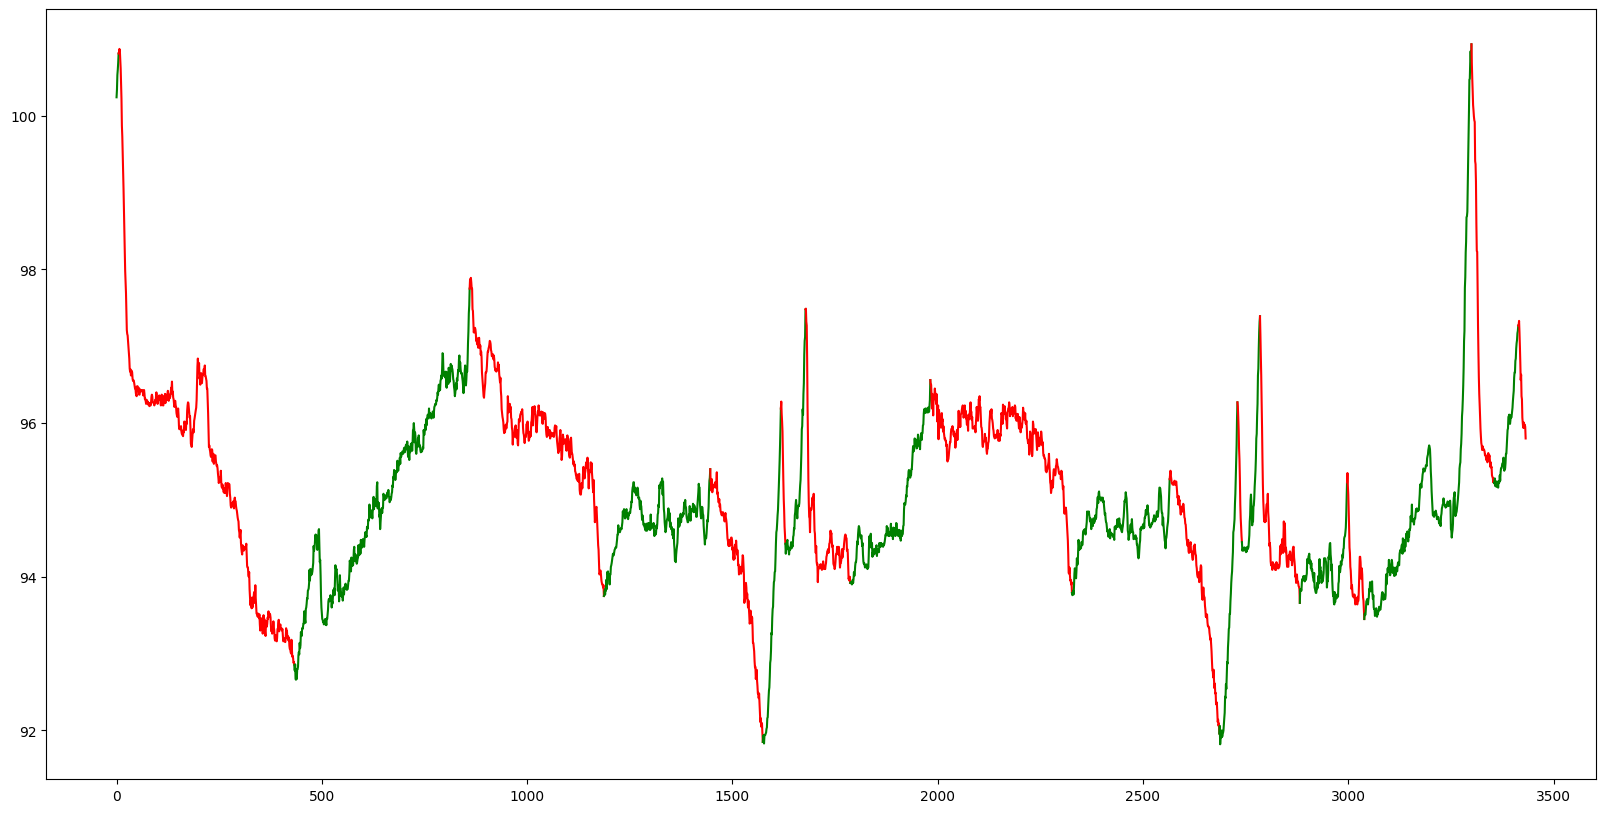

In [6]:
def directional_change(data, d=0.015):     
    p = pd.DataFrame({
    "Price": data
    })
    p["Event"] = ''
    run = "upward" # initial run
    ph = p['Price'][0] # highest price
    pl = ph # lowest price
    pl_i = ph_i = 0

    for t in range(0, len(p)):
        pt = p["Price"][t]
        if run == "downward":
            if pt < pl:
                pl = pt
                pl_i = t
            if pt >= pl * (1 + d):
                p.at[pl_i, 'Event'] = "start upturn event"
                run = "upward"
                ph = pt
                ph_i = t
                print(">> {} - Upward! : {}%, value {}".format(pl_i, round((pt - pl)/pl, 2), round(pt - pl,2)))
        elif run == "upward":
            if pt > ph:
                ph = pt
                ph_i = t
            if pt <= ph * (1 - d):
                p.at[ph_i, 'Event'] = "start downturn event"
                run = "downward"
                pl = pt
                pl_i = t
                print(">> {} - Downward! : {}%, value {}".format(ph_i, round((ph - pt)/ph, 3), round(ph - pt,2)))
    return p

p = directional_change([ele for _, ele in data], 0.015)
ids = p[p['Event'] != ''].index.tolist()

# last_id = 0
# green = True
# plt.figure(figsize=(20, 10))
# for i in ids:
#     X, Y = list(range(last_id, i + 1)), elevation_points[last_id:i + 1]
#     if green:
#         plt.plot(X, Y, color='green')
#     else:
#         plt.plot(X, Y, color='red')
#     green = not green
#     last_id = i

last_id = 0
green = True
plt.figure(figsize=(20, 10))
for i in ids:
    X, Y = list(range(last_id, data[i][0] + 1)), elevation_points[last_id:data[i][0] + 1]
    if green:
        plt.plot(X, Y, color='green')
    else:
        plt.plot(X, Y, color='red')
    green = not green
    last_id = data[i][0]

# plt.plot(elevation_points)
# plt.plot(cutX, cutY)
# plt.scatter(ids, [elevation_points[i] for i in ids], color='red')
plt.show()

In [7]:
from utilities import *

convert('map_data/', 'gpx_data/original/lemko.gpx', 'gpx_data/converted/lemko.gpx')

(0, (49.417358, 20.956789))

>> 2 - Downward! : 0.02%, value 1.53
>> 51 - Upward! : 0.02%, value 1.55
>> 101 - Downward! : 0.02%, value 1.57
>> 139 - Upward! : 0.02%, value 1.44
>> 165 - Downward! : 0.02%, value 1.74
>> 184 - Upward! : 0.02%, value 1.42
>> 199 - Downward! : 0.02%, value 1.54
>> 205 - Upward! : 0.02%, value 1.49
>> 216 - Downward! : 0.02%, value 1.66
>> 238 - Upward! : 0.02%, value 1.47
>> 253 - Downward! : 0.02%, value 1.57
>> 297 - Upward! : 0.02%, value 1.48
>> 322 - Downward! : 0.02%, value 1.43
>> 336 - Upward! : 0.02%, value 1.56
>> 351 - Downward! : 0.02%, value 1.62
>> 357 - Upward! : 0.02%, value 1.65
>> 369 - Downward! : 0.02%, value 1.86
>> 387 - Upward! : 0.02%, value 1.57
>> 405 - Downward! : 0.02%, value 1.59
>> 416 - Upward! : 0.02%, value 1.62
>> 452 - Downward! : 0.02%, value 1.52
>> 469 - Upward! : 0.02%, value 1.59
>> 478 - Downward! : 0.02%, value 1.47
>> 484 - Upward! : 0.02%, value 1.5


ValueError: x and y must have same first dimension, but have shapes (0,) and (6,)

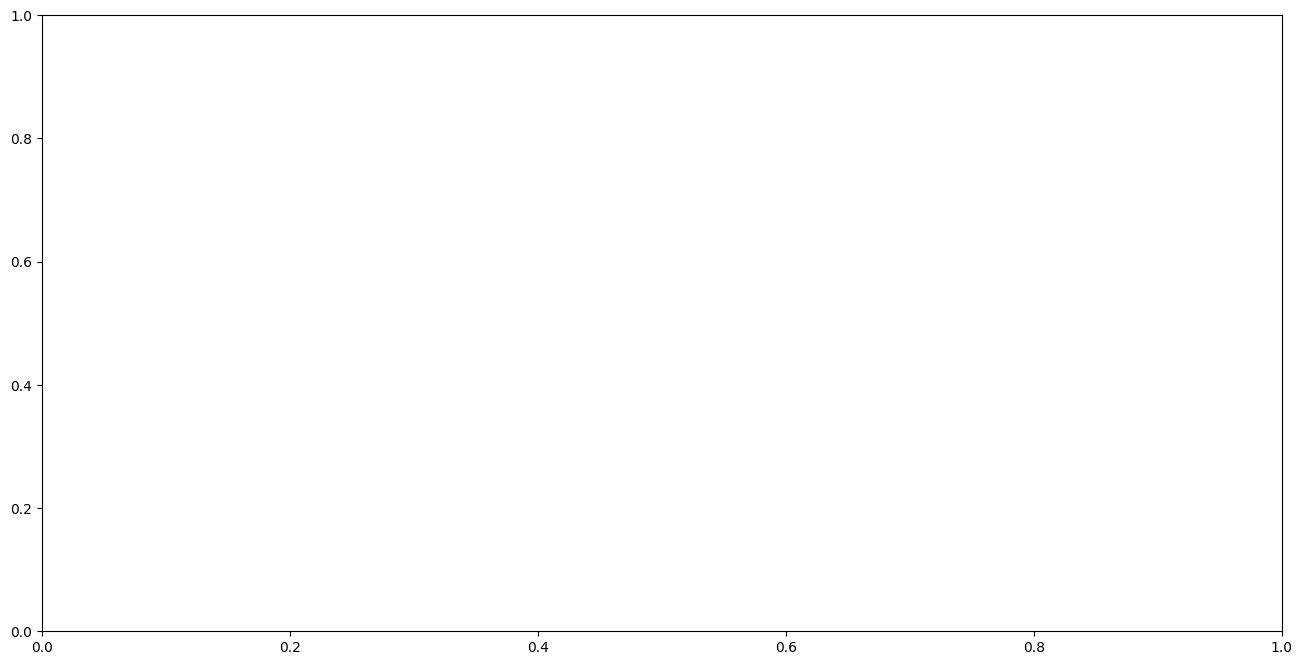

In [8]:
from utilities import *

elevation_points = parse_gpx_to_points('gpx_data/converted/1.gpx')
plot, ids_change = plot_directional_change([(i, ele) for i, (_, ele) in enumerate(elevation_points)], 0.015)
table([(i, ele) for i, (_, ele) in enumerate(elevation_points)], ids_change)

In [1]:
from utilities import *
# convert('map_data/', 'gpx_data/original/run.gpx', 'gpx_data/converted/3.gpx')
df = database_covers('map_data/')
elevation_points = parse_gpx_to_points('gpx_data/original/run.gpx')
# find_elevation(df, elevation_points[0][0][1], elevation_points[0][0][0])
convert_latlon_to_xll(elevation_points[0][0][1], elevation_points[0][0][0])


(0, (52.234454, 21.171659))